# ***Language Detection***

## Google Translate is one of the most popular language translators in the world which is used by so many people around the world. It also includes a machine learning model to detect languages that you can use if you don’t know which language you want to translate.

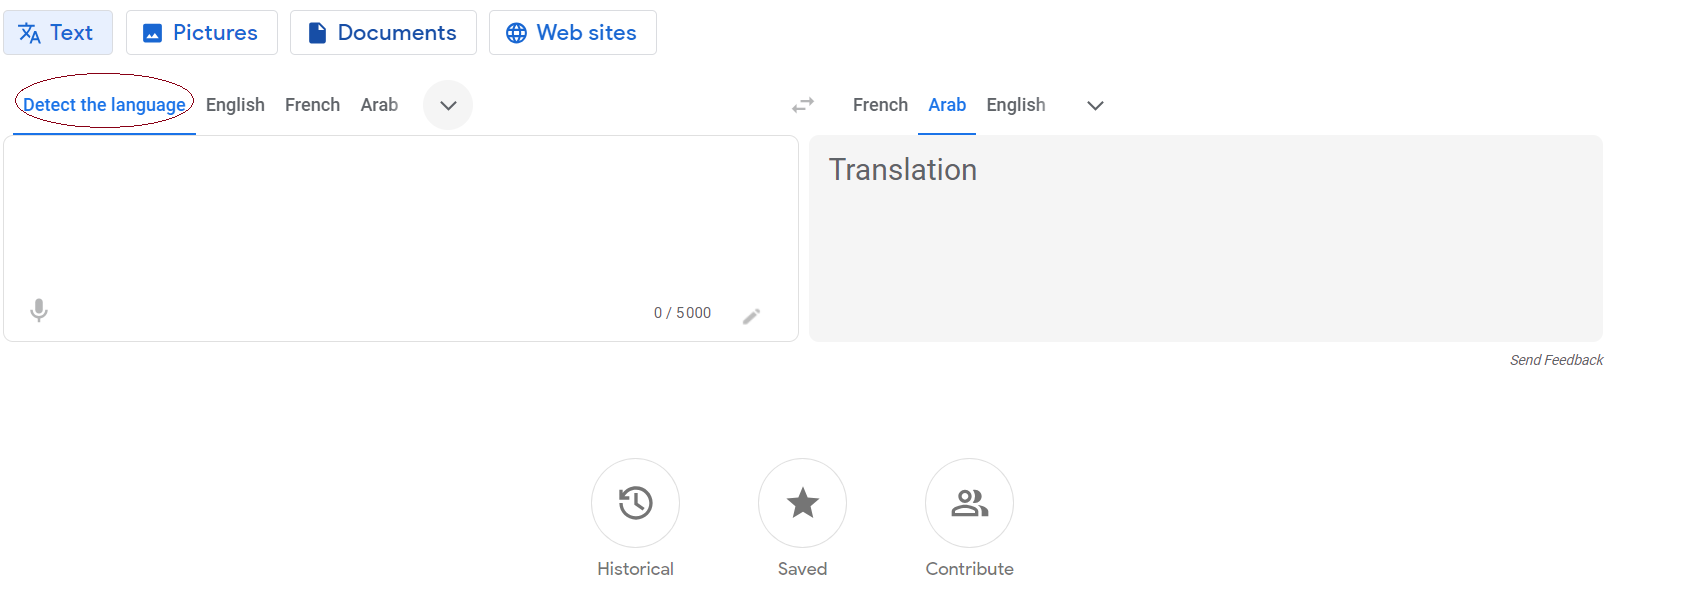

# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Loading dataset

In [3]:
data = pd.read_csv("LanguageDetection_Dataset.csv")
print(data.head(10))

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
5  [2] In ancient philosophy, natura is mostly us...  English
6  [3][4] \nThe concept of nature as a whole, the...  English
7  During the advent of modern scientific method ...  English
8  [5][6] With the Industrial revolution, nature ...  English
9  However, a vitalist vision of nature, closer t...  English


# Checking If dataset contains any null values or not

In [4]:
data.isnull()

,Text,Language
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10332,False,False
10333,False,False
10334,False,False
10335,False,False


import numpy as np
from google.colab import autoviz
df_3142121790540019947 = autoviz.get_registered_df('df_3142121790540019947')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3142121790540019947, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4837600306880922805 = autoviz.get_registered_df('df_4837600306880922805')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4837600306880922805, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8505915665129496408 = autoviz.get_registered_df('df_8505915665129496408')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8505915665129496408, *['index', 'count()', None], **{})
chart

<Axes: >

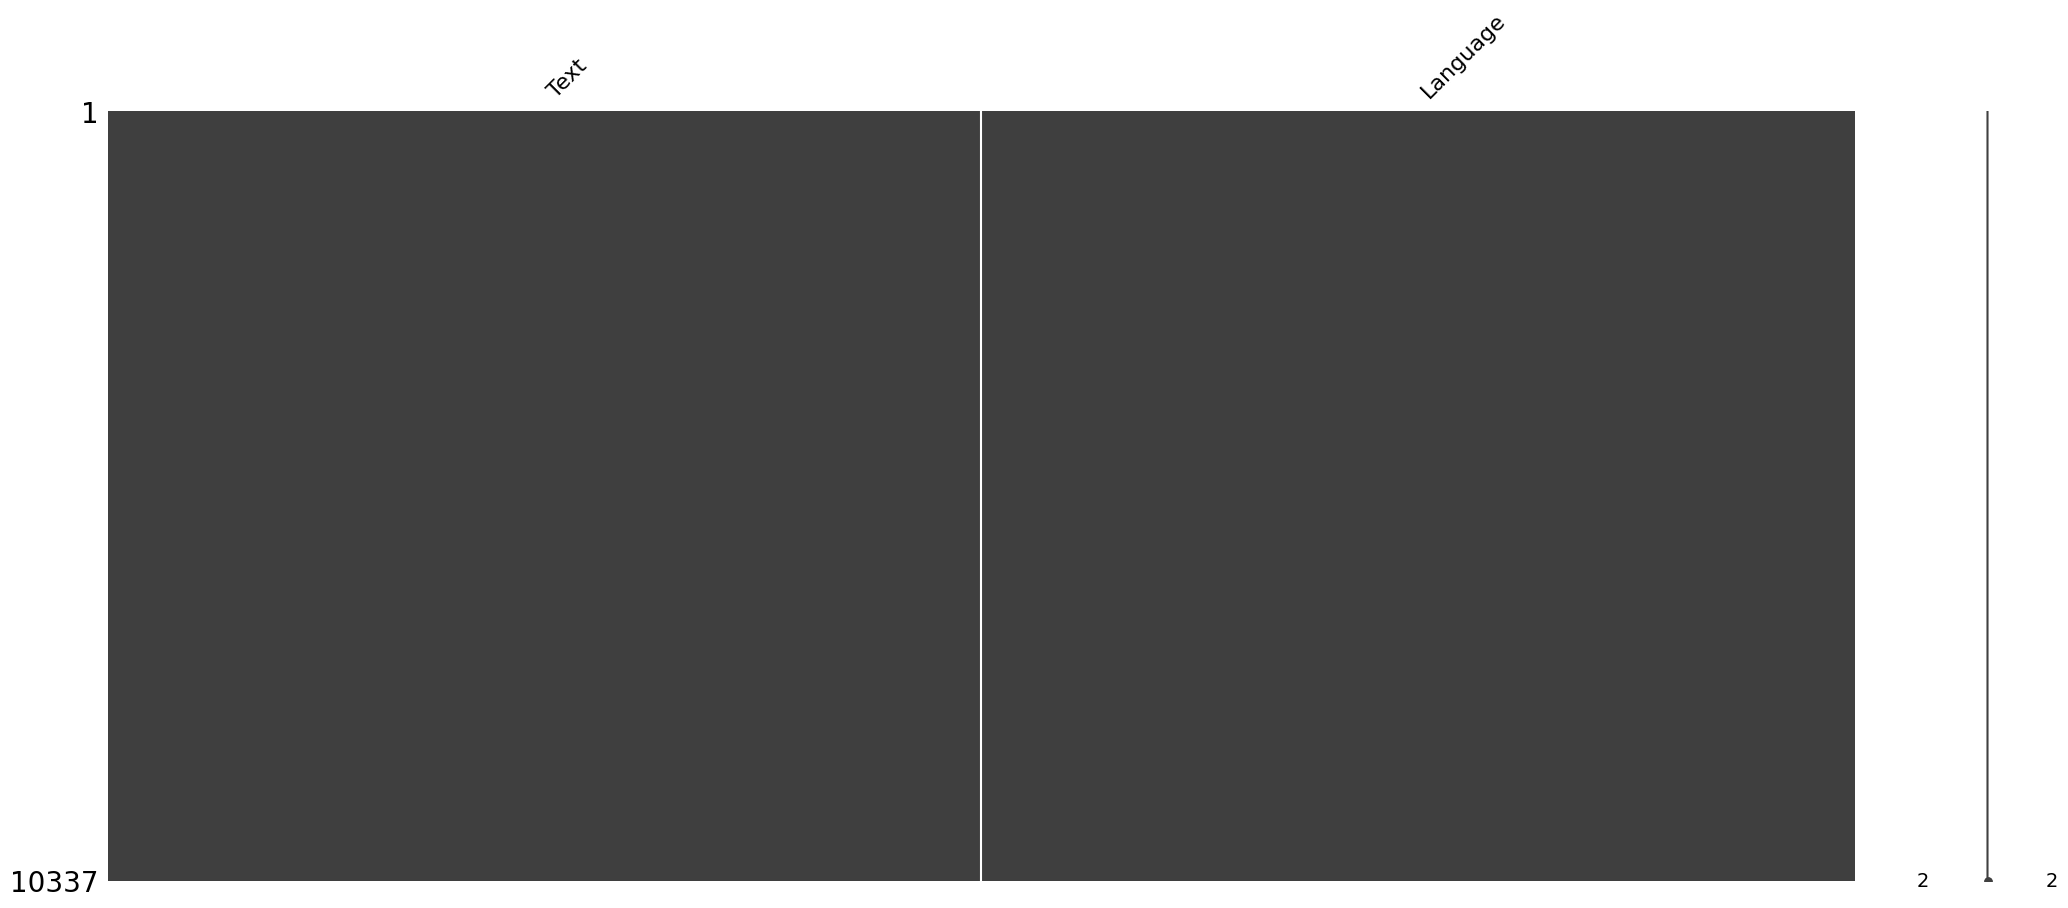

In [18]:
import missingno as msno
msno.matrix(data)

In [5]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

# All unique languages exist in dataset

In [9]:
data["Language"].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

# Dataset contains 17 languages with own sentences from each language

In [8]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Dataset Columns

In [17]:
data.columns

Index(['Text', 'Language'], dtype='object')

# Split the data into training and test sets

In [11]:
x = np.array(data["Text"])
y = np.array(data["Language"])

In [56]:
c_v = CountVectorizer()
X = c_v.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.35,random_state=123)

In [35]:
print(x_train.shape)
print(x_test.shape)

(8786, 39928)
(1551, 39928)


# Training a language detection model using GaussianNB :

In [57]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
x_train=x_train.toarray()
x_test=x_test.toarray()
gaussian.fit(x_train,y_train)
gaussian.score(x_test,y_test)

0.9776119402985075

# using model to detect the language of a text by taking a user input :

In [58]:
user_input = input("Enter a Text: ")
data = c_v.transform([user_input]).toarray()
output = gaussian.predict(data)
print(output)

Enter a Text: L'intelligence artificielle est à un point de non-retour.
['French']
